### 목표
- 패션 이미지 데이터(10종류)를 활용한 다중분류 딥러닝 모델 구현

In [11]:
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential  
import matplotlib.pyplot as plt
from tensorflow.keras.layers import InputLayer, Dense, Flatten
#학습용 패션 이미지 데이터 로드
from tensorflow.keras.datasets import fashion_mnist

In [12]:
data = fashion_mnist.load_data()

In [13]:
(X_train,y_train),(X_test,y_test) = data 

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


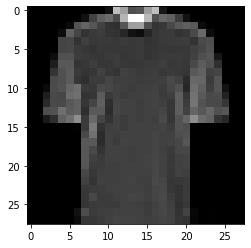

In [15]:
plt.imshow(X_train[59998], cmap='gray')

In [16]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [18]:
y_train_one_hot

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,1,0,0,0,0
59996,0,1,0,0,0,0,0,0,0,0
59997,0,0,0,1,0,0,0,0,0,0
59998,1,0,0,0,0,0,0,0,0,0


### 신경망 모델링
- 1. 신경망 설계
- 2. 학습 / 평가방법 설정
- 3. 학습. 시각화
- 4. 모델평가

In [25]:
# 신경망 설계
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(500, activation="sigmoid"))
model.add(Dense(300, activation="sigmoid"))
model.add(Dense(100, activation="sigmoid"))
model.add(Dense(50, activation="sigmoid"))

model.add(Dense(10, activation="softmax")) # 0~9까지의 정답레이블(총10개)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 500)               392500    
                                                                 
 dense_19 (Dense)            (None, 300)               150300    
                                                                 
 dense_20 (Dense)            (None, 100)               30100     
                                                                 
 dense_21 (Dense)            (None, 50)                5050      
                                                                 
 dense_22 (Dense)            (None, 10)                510       
                                                                 
Total params: 578,460
Trainable params: 578,460
Non-tr

In [26]:
# 2.학습/평가방법 설정
model.compile(loss="categorical_crossentropy",    # 안쓰면 디폴트는 mse
              optimizer="SGD",
              metrics=['acc'])

In [28]:
# 학습
h = model.fit(X_train,y_train_one_hot,
              validation_split=0.2,
              # batch_size : 한번에 데이터를 학습시키는 최소 단위
              batch_size=128, # 디폴트 값은 32
              epochs=50)

# batch_size 크게 → 한번에 학습시키는 데이터의 양이 많기 떄문에 메모리 소모가 큼
#                    대신 많은 데이터를 넣기 떄문에 속도는 빼름(PC성능이 좋을때)
# batch_size 작게 → 메모리 소모가 적음(PC성능이 안좋을때)

Epoch 1/50
375/375 [==============================] - 2s 4ms/step - loss: 2.3160 - acc: 0.1520 - val_loss: 2.2864 - val_acc: 0.3158
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 2.2770 - acc: 0.2898 - val_loss: 2.2665 - val_acc: 0.3915
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 2.2535 - acc: 0.3653 - val_loss: 2.2380 - val_acc: 0.2806
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 2.2153 - acc: 0.3793 - val_loss: 2.1867 - val_acc: 0.3422
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 2.1407 - acc: 0.3433 - val_loss: 2.0832 - val_acc: 0.3589
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 2.0040 - acc: 0.3222 - val_loss: 1.9195 - val_acc: 0.3214
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 1.8402 - acc: 0.3389 - val_loss: 1.7718 - val_acc: 0.3481
Epoch 8/50
375/375 [==============================] - 1s 3ms/step - loss: 1.

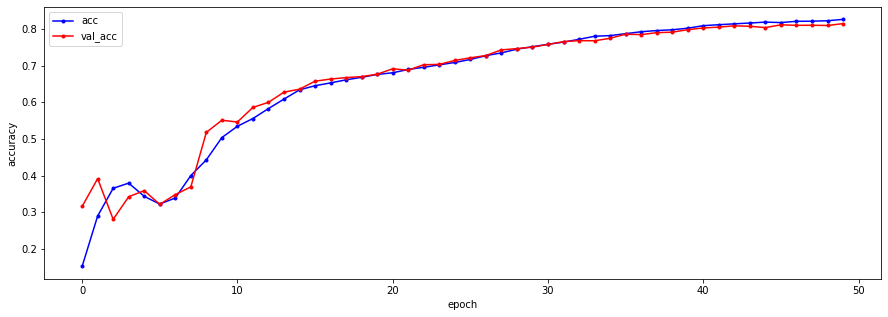

In [30]:
plt.figure(figsize=(15,5))
plt.plot(h.history['acc'], label='acc', marker='.',c='blue')
plt.plot(h.history['val_acc'], label='val_acc',c='red', marker='.')
plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.legend()
plt.show()

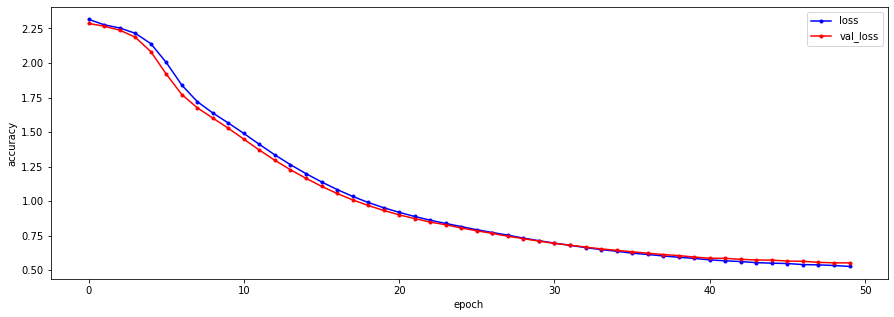

In [32]:
plt.figure(figsize=(15,5))
plt.plot(h.history['loss'], label='loss', marker='.',c='blue')
plt.plot(h.history['val_loss'], label='val_loss',c='red', marker='.')
plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.legend()
plt.show()

In [33]:
# 4. 모델평가 
model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.5765 - acc: 0.8063


[0.5764619708061218, 0.8062999844551086]

- 손글씨 데이터에 비해 많은 정보들이 담겨져있었고 우리 눈으로 보기에도 쉽게 분류되지 않는 이미지도 있었기 때문에 기계의 입장에서도 학습률이 비교적 낮게 나오게 됨!